**APS | Parte 2: Correlações**

Integrantes:
* Isabelle Da Silva Santos
* Livia Tanaka

In [11]:
import pandas as pd
df_ia = pd.read_csv('dados/inseguranca_alimentar/70397afd-e704-4908-930d-3fc65e331775_Data.csv')
df_tm = pd.read_csv('dados/taxa_mortalidade/52db136a-1fc5-4f27-ab83-5206ac756f1e_Data.csv')
 
filtro = ['Country Name', '2015 [YR2015]','2016 [YR2016]','2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]']
df_ia_ = df_ia[filtro]
df_tm_ = df_tm[filtro]


In [12]:
paises = {'Brazil': [[],[]], 'Norway':[[],[]], 'Afghanistan':[[],[]]}
for pais in paises:
    df_inseguranca = df_ia_[df_ia_['Country Name'] == pais]
    df_mortalidade = df_tm_[df_tm_['Country Name'] == pais]
    for ano in range(2015,2020):
        data = str(ano) + ' [YR'+str(ano)+']'
        i = df_inseguranca[data]
        m = df_mortalidade[data]
        paises[pais][0].append(i)
        paises[pais][1].append(m)

In [13]:
df_ia_ = df_ia_.set_index('Country Name')
df_tm_ = df_tm_.set_index('Country Name')

In [15]:
import numpy as np
correlacoes = []
covariancias = []
for pais in paises:
    df_inseguranca = pd.DataFrame(df_ia_.loc[pais])
    df_mortalidade = pd.DataFrame(df_tm_.loc[pais])

    df_inseguranca.rename(columns={str(pais): 'Insegurança Alimentar'}, inplace=True)
    df_mortalidade.rename(columns={str(pais): 'Mortalidade'}, inplace=True)
    
    # ambos = pd.concat((df_inseguranca,df_mortalidade),axis=1)
    correlacao = np.corrcoef(df_inseguranca['Insegurança Alimentar'], df_mortalidade['Mortalidade'])[0,1]
    covariancia = np.cov(df_inseguranca['Insegurança Alimentar'], df_mortalidade['Mortalidade'])[0,1]

    correlacoes.append(correlacao)
    covariancias.append(covariancia)



In [6]:
df = pd.DataFrame()
df['correlações'] = correlacoes
df['covariâncias'] = covariancias
df['países'] = ['Brasil', 'Noruega', 'Afeganistão']
df.set_index('países', inplace=True)
df.head()


,correlações,covariâncias
países,,
Brasil,-0.559503,-0.1500
Noruega,0.790569,0.0200
Afeganistão,-0.961020,-0.2535


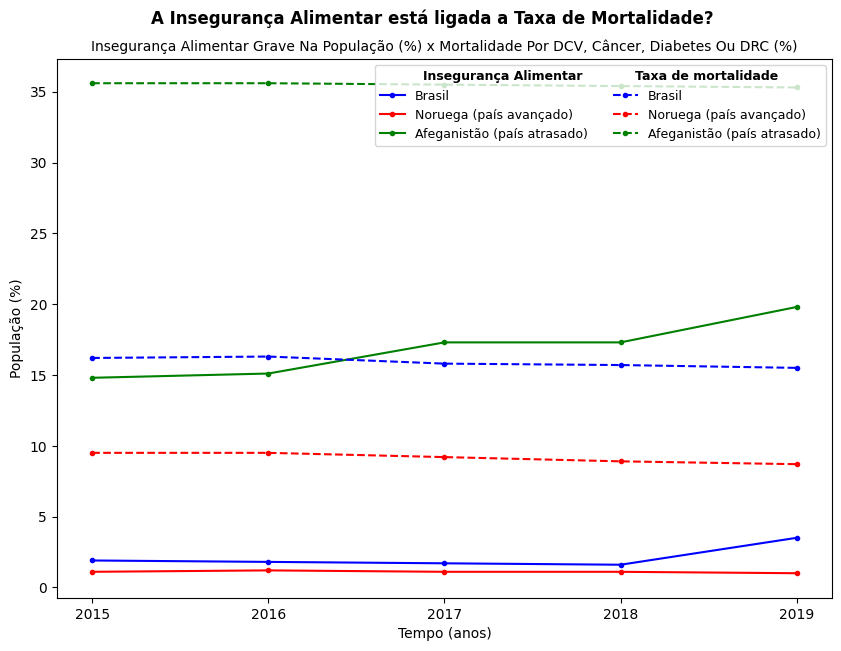

In [16]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd 

plt.style.use('default')
anos = list(range(2015, 2020))
porcentagem = list(range(0,22,2))
plt.figure(figsize=(10,7))
plt.suptitle('A Insegurança Alimentar está ligada a Taxa de Mortalidade?', y=0.95, fontsize=12, fontweight='semibold')
plt.title('Insegurança Alimentar Grave Na População (%) x Mortalidade Por DCV, Câncer, Diabetes Ou DRC (%)', fontsize=10)

# insegurança alimentar
plt.plot(anos, paises['Brazil'][0], marker='.',color='b',label='Brasil')
plt.plot(anos, paises['Norway'][0], marker='.',color='r', label='Noruega (país avançado)')
plt.plot(anos, paises['Afghanistan'][0], marker='.',color='g', label='Afeganistão (país atrasado)')

# taxa de mortalidade
plt.plot(anos, paises['Brazil'][1], marker='.',linestyle = '--',color='b',label='Brasil')
plt.plot(anos, paises['Norway'][1], marker='.',linestyle = '--',color='r', label='Noruega (país avançado)')
plt.plot(anos, paises['Afghanistan'][1], marker='.',linestyle = '--',color='g', label='Afeganistão (país atrasado)')

plt.xticks(anos)
plt.xlabel('Tempo (anos)')
plt.ylabel('População (%)')
plt.yticks()
# ledenda
legenda = plt.legend(fontsize=9, ncol=2)
legenda.set_title('Insegurança Alimentar            Taxa de mortalidade', prop={'size': 9, 'weight':'bold'})
plt.show()

**ANÁLISE**

Como já explicitado anteriormente, a fome e a insegurança alimentar podem acarretar diversas consequências. Tais consequências abrangem problemas de saúde que podem se transformar em mazelas sociais, educacionais e econômicas, as quais são difíceis de reverter. Por isso, formamos a hipótese de que países com prevalência de insegurança alimentar grave tendem a ter uma população mais propensa às doenças vinculadas a má alimentação, que é tipicamente ligada a efeitos metabólicos devido ao excesso de gordura e carboidratos. Essas irregularidades no metabolismo excedem os níveis recomendados pelo “Guia alimentar para a população brasileira” (Ahmed, Downs & Fanzo, 2020). Portanto, pessoas subnutridas teriam maior predisposição a desenvolver doenças como diabetes, câncer e colesterol alto ao longo do tempo.
 
Desse modo, o indicador “Mortalidade Por DCV, Câncer, Diabetes Ou DRC Entre As Idades Exatas De 30 E 70 Anos (%)”, fornecido pela base de dados do Banco Mundial, é adequado para evidenciar a relação entre a incidência de doenças na população adulta e a insegurança alimentar. Assim, visando verificar a hipótese apresentada acima, utilizamos o cálculo da correlação. A correlação é um coeficiente que mensura o comportamento de uma variável em uma situação onde a outra variável apresenta mudanças no curso de seu desenvolvimento temporalmente. Dessa maneira, viabilizamos a identificação de alguma relação entre a variabilidade de ambas. Vale ressaltar que, nesse caso, a escala da correlação se dá entre -1 até 1. As variáveis em questão referem-se ao indicador proposto acima e ao de “Prevalência De Insegurança Alimentar Grave Na População (%)”, já analisado anteriormente. Outro indicador relevante para evidenciar a relação proposta é a covariância. A covariância é a média da somatória dos produtos das diferenças entre os elementos da série X e Y e suas respectivas médias. 

Os cálculos mostram que o Afeganistão, país com um dos piores índices de insegurança alimentar, possui uma covariância de -0.25 e uma correlação de aproximadamente -0.96, representando uma correlação negativa quase perfeita. Isso quer dizer que, ao contrário de nossa hipótese, conforme a insegurança alimentar aumenta a mortalidade se mantém constante, tendência observada no gráfico. Dessa forma, entendemos que a mortalidade em decorrência das doenças em questão podem estar relacionadas a outro indicador, proveniente, como a instabilidade geopolítica que o país vem enfrentando. Já o Brasil, possui uma correlação e covariância de, respectivamente, -0,55 e -0,1500, tendo o comportamento de seus gráficos bastante distinto. Por fim, a Noruega, país com um dos menores índices de insegurança alimentar, possui uma correlação de 0,79 e uma covariância de 0,02, fator que revela a existência de correlação positiva entre os indicadores analisados, entretanto, a covariância é mínima.
 
Esses dados indicam que a hipótese que liga a subnutrição com a mortalidade não se confirma, pois a partir da análise do gráfico podemos observar que a insegurança alimentar não está diretamente relacionada a taxa de mortalidade, visto que, a mesma possui diversos fatores de interferência. 

**FONTES**
 
JORNAL MINUANO. Doenças respiratórias e alimentação, 14 de agosto de 2017. Disponível em: https://www.jornalminuano.com.br/noticia/2017/08/14/doencas-respiratorias-e-alimentacao Acessado em 15/09/2022.

NEUMAM, Camila. 19 milhões de brasileiros vivem com fome; consequências na saúde são irreversíveis, 28 de outubro de 2021. Disponível em:
https://www.cnnbrasil.com.br/saude/19-milhoes-de-brasileiros-vive-com-fome-consequencias-na-saude-sao-irreversiveis/ Acessado em 15/09/2022.

MANUELA CORREA. Dia Mundial da Alimentação: Guia Alimentar da População Brasileira é referência mundial, 16 de Outubro de 2021. https://brasil61.com/n/dia-mundial-da-alimentacao-guia-alimentar-brasileiro-e-referencia-mundial-bras216234 Acessado em 15/09/2022.

Downs, S. M., Ahmed, S., Fanzo, J., & Herforth, A. (2020). Food environment typology: advancing an expanded definition, framework, and methodological approach for improved characterization of wild, cultivated, and built food environments toward sustainable diets. Foods, 9(4), 532.
https://www.mdpi.com/2304-8158/9/4/532

STELLA LEGNAIOLI. O que é insegurança alimentar? Impactos e dimensões.
https://www.ecycle.com.br/inseguranca-alimentar/ Acessado em 15/09/2022.

Base de dados:
https://datacatalog.worldbank.org/indicator/afe4388d-e4ce-eb11-bacc-000d3a3b9510/Mortality-from-CVD--cancer--diabetes-or-CRD-between-exact-ages-30-and-70----


##### As palavras destacadas em <span style ='color:Violet'>violeta</span> no texto a seguir representam quais foram as modificações feitas na entrega anterior para contemplar o feedback que foi recebido.

**INTRODUÇÃO**

Os Objetivos de Desenvolvimento Sustentável (ODS), estabelecidos pela Organização das Nações Unidas (ONU) em 2015, propõe aos 193 Estados-membros da ONU a adoção de um plano de ação global que definiu um quadro de 17 objetivos a serem trabalhados pelas nações até o ano de 2030. Desse modo, a agenda 2030 abrange três principais <span style ='color:Violet'> áreas</span> para o desenvolvimento sustentável, são eles: social, ambiental e econômico. De acordo com a ONU, o segundo ODS, denominado como “Fome zero e Agricultura Sustentável”, tem por objetivo  “Erradicar a fome, alcançar a segurança alimentar, melhorar a nutrição e promover a agricultura sustentável”. 

Sendo a primeira meta do ODS em questão, a erradicação da fome é <span style ='color:Violet'>essencial</span> para o estabelecimento de uma sociedade sustentável, tendo em vista que o acesso à alimentação adequada é um direito humano básico <span style ='color:Violet'>previsto</span> no artigo 25 da Declaração Universal dos Direitos Humanos. 

Ademais, o consumo de alimentos saudáveis na primeira infância – do nascimento até completar 6 anos -, segundo a Unicef, é essencial para o crescimento ideal do corpo e cérebro, de modo que, possibilita que a criança alcance todo seu potencial de desenvolvimento. <span style ='color:Violet'>Entretanto</span>, a desnutrição infantil é prejudicial, especialmente no que <span style ='color:Violet'>diz respeito ao</span> comprometimento da aprendizagem, <span style ='color:Violet'>através</span> do mau desenvolvimento cerebral, além do risco à baixa imunidade, elevando a ocorrência de infecções que, por vezes, podem levar à morte. 

Nesse sentido, é <span style ='color:Violet'>importante</span> enfatizar que a fome e a subnutrição afeta também na <span style ='color:Violet'>tendência</span> da população adulta desenvolver doenças, bem como na redução da produtividade, principal responsável pela geração de riqueza para as nações. Além disso, tal fator ainda impede o aumento da renda e, consequentemente, <span style ='color:Violet'>atrapalha</span> a melhoria dos meios de vida da população. 

Desse modo, com o <span style ='color:Violet'>intuito</span> de monitorar a evolução das medidas adotadas pelos países para o comprimento do objetivo, o Banco Mundial publica uma extensa base de dados sobre aspectos atrelados aos ODS. Nesse acervo, um dos indicadores que mede o desempenho do segundo objetivo é a “Prevalência De Insegurança Alimentar Grave Na População (%)”. De acordo com a professora da Faculdade de Medicina da UFMG, Elaine Machado, “a insegurança alimentar não é só a falta, mas também a substituição de alimentos ricos em nutrientes e vitaminas, por alimentos mais baratos, …, na tentativa de compensar o preço dos alimentos". Com isso, tal indicador é uma forma de <span style ='color:Violet'>avaliar</span> o sucesso das metas deste ODS: o alcance da segurança alimentar e, consequentemente, a erradicação da fome, já que quanto menor o índice de insegurança alimentar de determinado país, mais próximo essa nação está do objetivo estabelecido.

Portanto, conclui-se que, os ODS de “Fome zero e Agricultura Sustentável” é de extrema relevância para que as nações atinjam as demais metas, visto que, a mesma impacta em diversos fatores relacionados ao fim da pobreza, proteção do meio ambiente e clima, além da garantia de que as todas as pessoas possam desfrutar da paz e prosperidade.